In [25]:
##usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#geopandas
import geopandas
#dataset
chipotle = pd.read_csv("../datasets/chipotle_stores.csv")

In [26]:
#Map
usa = geopandas.read_file('../shapefiles/2017_us_state/tl_2017_us_state.shp')
usa = usa.to_crs("EPSG:4326")

In [27]:
#Chipotle to Geopandas
gdf = geopandas.GeoDataFrame(
    chipotle, geometry=geopandas.points_from_xy(chipotle.longitude, chipotle.latitude))


## Create a X with LONG/LAT to be LAZIER

In [28]:
X = gdf[['longitude', 'latitude']]

In [29]:
#Kmeans

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
centroid_kmean = kmeans.cluster_centers_

In [31]:
centroid_frame_kmean = {"longitude":centroid_kmean[0:,0],"latitude":centroid_kmean[:,1]}

In [32]:
#Gaussian

In [33]:
from sklearn.mixture import GaussianMixture
gs = GaussianMixture(n_components=50)
gs.fit(X)
gs_pred = gs.predict(X)

In [37]:
from sklearn.neighbors import NearestCentroid

In [38]:
clf = NearestCentroid()

In [39]:
clf.fit(X, gs_pred)
gs_dist = clf.centroids_

In [40]:
centroid_frame_gaussian = {"longitude":gs_dist[0:,0],"latitude":gs_dist[:,1]}

In [ ]:
#Affinity

In [41]:
from sklearn.cluster import AffinityPropagation
affinityProp = AffinityPropagation(damping=0.92,verbose=True, random_state=42)#,preference=preference
affinityProp.fit(X)

Converged after 67 iterations.


AffinityPropagation(damping=0.92, random_state=42, verbose=True)

In [42]:
centroid_affinity = affinityProp.cluster_centers_

In [43]:
centroid_frame_affinity = {"longitude":centroid_affinity [0:,0],"latitude":centroid_affinity [:,1]}

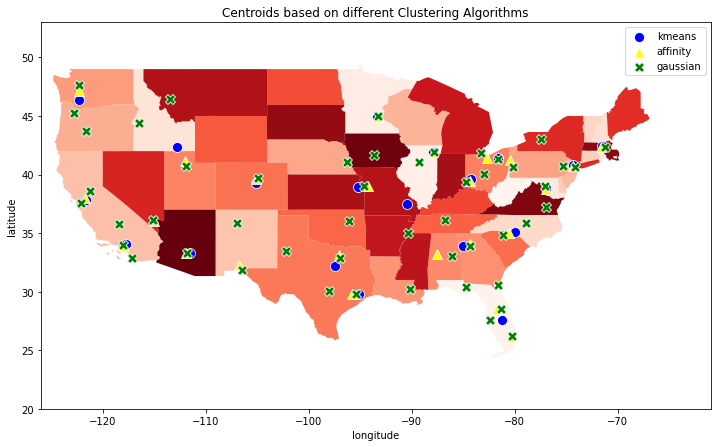

In [132]:
#Map
fig = plt.figure(1, figsize=(12,9)) 
ax = fig.add_subplot()

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-126, -61)
ax.set_ylim(20, 53)

usa.plot(ax=ax, cmap="Reds", linewidth=.8)

a = sns.scatterplot(ax=ax, data =centroid_frame_kmean,x="longitude",y="latitude",marker="o",s=100,color="blue")
b = sns.scatterplot(ax=ax, data =centroid_frame_affinity,x="longitude",y="latitude",marker="^",s=100,color="yellow")
c = sns.scatterplot(ax=ax, data =centroid_frame_gaussian,x="longitude",y="latitude",marker="X",s=100,color="green")

plt.title("Centroids based on different Clustering Algorithms")
fig.savefig('../plots/combined.png',dpi=100)
ax.legend(["kmeans","affinity","gaussian"],loc="best")
plt.show()
#circle = kmeans
#triangle = affinity
#cross = gaussian